In [3]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

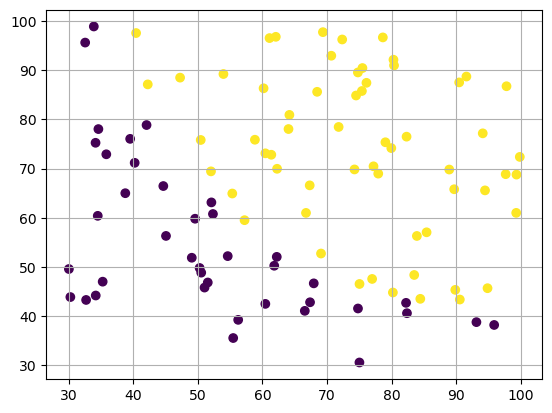

In [8]:
datos=pd.read_csv('ex2data1.txt',header=None)
y=datos.iloc[:,2].values
x=datos.iloc[:,:2].values

plt.scatter(x[:,0],x[:,1],c=y)
plt.grid()

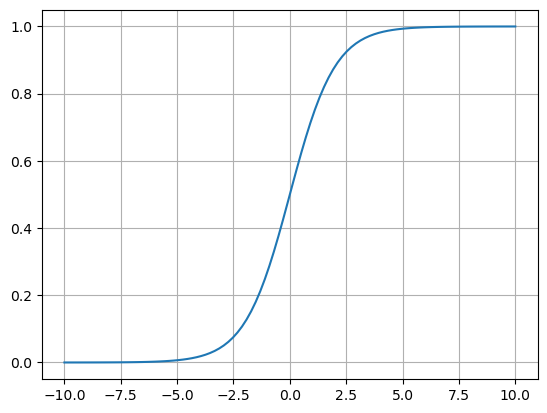

In [10]:
def sigmoidal(z):
    return 1/(1+np.exp(-z))
z=np.linspace(-10,10,100)
plt.plot(z,sigmoidal(z))
plt.grid()

In [37]:
def logistica(beta,x):
    Xa=np.hstack((np.ones((x.shape[0],1)),x))
    #print(Xa.shape)
    return sigmoidal(Xa@beta)

In [56]:
def costo(beta,x,y):
    yhat=logistica(beta,x)
    maximizar=[]
    for i in range(len(y)):
        maximizar.append(-np.log(yhat[i]) if y[i]==1 else -np.log(1-yhat[i]))
    return np.mean(maximizar)

In [71]:
opt.minimize(costo,np.random.rand(3),args=(x,y))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.20349770159110336
        x: [-2.516e+01  2.062e-01  2.015e-01]
      nit: 27
      jac: [-1.676e-08 -1.740e-06 -2.049e-08]
 hess_inv: [[ 3.340e+03 -2.678e+01 -2.691e+01]
            [-2.678e+01  2.285e-01  2.032e-01]
            [-2.691e+01  2.032e-01  2.320e-01]]
     nfev: 132
     njev: 33

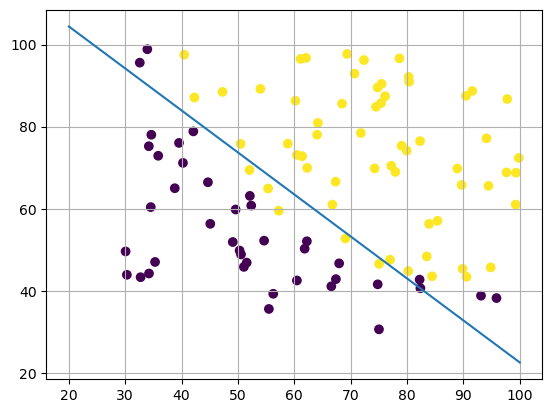

In [72]:
plt.scatter(x[:,0],x[:,1],c=y)
x_=np.linspace(20,100,100)
plt.plot(x_,-(sol.x[0]+sol.x[1]*x_)/sol.x[2])
plt.grid()

# Repaso

Si cada trabajador inicia laborando el día $i$ y trabaja cinco días concecutivos, la función objetivo (criterio a minimizar) es
$$
\min\sum_{i=1}^7x_i
$$
Si $x=[x_1,x_2,x_3,x_4,x_5,x_6,x_7]^T$, escribimos las siguientes las restricciones:
* Mínimo número de trabajadores para el viernes: $[1,1,1,1,1,0,0]x\geq19$
* Mínimo número de trabajadores para el sábado: $[0,1,1,1,1,1,0]x\geq18$
* Mínimo número de trabajadores para el domingo: $[0,0,1,1,1,1,1]x\geq11$
* Mínimo número de trabajadores para el lunes: $[1,0,0,1,1,1,1]x\geq14$
* Mínimo número de trabajadores para el martes: $[1,1,0,0,1,1,1]x\geq13$
* Mínimo número de trabajadores para el miércoles: $[1,1,1,0,0,1,1]x\geq15$
* Mínimo número de trabajadores para el jueves: $[1,1,1,1,0,0,1]x\geq16$

In [74]:
# Problema de programación lineal
A=-np.array([[1,1,1,1,1,0,0],
             [0,1,1,1,1,1,0],
             [0,0,1,1,1,1,1],
             [1,0,0,1,1,1,1],
             [1,1,0,0,1,1,1],
             [1,1,1,0,0,1,1],
             [1,1,1,1,0,0,1]])
b=-np.array([19,18,11,14,13,15,16])
c=np.array([1,1,1,1,1,1,1])

opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 22.0
              x: [ 4.000e+00  3.000e+00  5.000e+00  4.000e+00  3.000e+00
                   3.000e+00  0.000e+00]
            nit: 6
          lower:  residual: [ 4.000e+00  3.000e+00  5.000e+00  4.000e+00
                              3.000e+00  3.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  3.333e-01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  4.000e+00  0.000e+00
                              0.000e+00  0.0

**Respuesta:**

Se necesitan al menos **22** trabajadores donde:
* 4 de ellos inicial laborando el lunes y jueves,
* 3 inician laborando los días martes, viernes y sábado,
* 5 inician laborando el miércoles y
* ningún trabajador inicia el domingo